<a href="https://colab.research.google.com/github/deecchristen/machine-learning-final-project/blob/main/Dee's_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Final Project
For my final project I looked at Phishing Websites dataset. I used ADaBoost and Random forests.

Mohammad, R. & McCluskey, L. (2012). Phishing Websites [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51W2X.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

df = pd.concat([X, y], axis=1)


The data is already numerical so we don't need to adjust it.

In [5]:
df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


There are no nulls.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int64
 14  links_

There is alot of duplicates but that does make sense for this data. I'm not getting rid of duplicates because I don't know if they are accually duplicates.

In [7]:
df.duplicated().sum()

np.int64(5206)

There is more phishing websites than not.

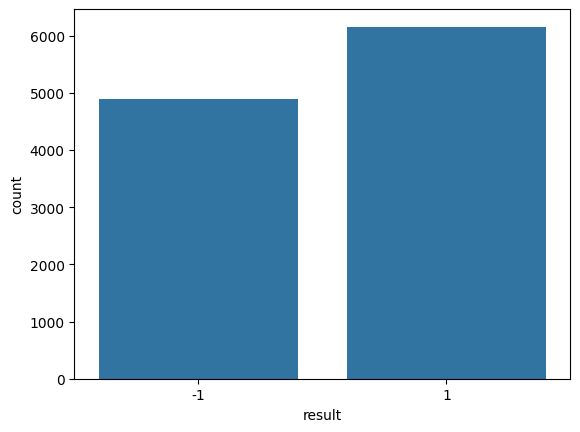

In [8]:
sns.countplot(x=df['result'])
plt.show()

Spliting the data into test and train.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42
)

In [10]:
error_list = []
for i in range (1, len(X.columns) + 1):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = 1 - accuracy_score(y_test, predictions)
    error_list.append(error)

print(error_list)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.1099855282199711, 0.1099855282199711, 0.08719247467438496, 0.08719247467438496, 0.08863965267727936, 0.08104196816208398, 0.07850940665701878, 0.07887120115774238, 0.07959479015918958, 0.07597684515195369, 0.07814761215629518, 0.07489146164978289, 0.07633863965267729, 0.0741678726483358, 0.07850940665701878, 0.07850940665701878, 0.07706222865412449, 0.07597684515195369, 0.0734442836468886, 0.0738060781476122, 0.0734442836468886, 0.07561505065123009, 0.0734442836468886, 0.0738060781476122, 0.0734442836468886, 0.06982633863965271, 0.0734442836468886, 0.07054992764109991, 0.0741678726483358, 0.0734442836468886]


Here I wanted to see how many estimators I should use, so I created a line plot to see error rate vs number of estimators.

/tmp/ipython-input-876031713.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(1, len(X.columns) + 1), y=error_list, marker='o', palette = "husl")


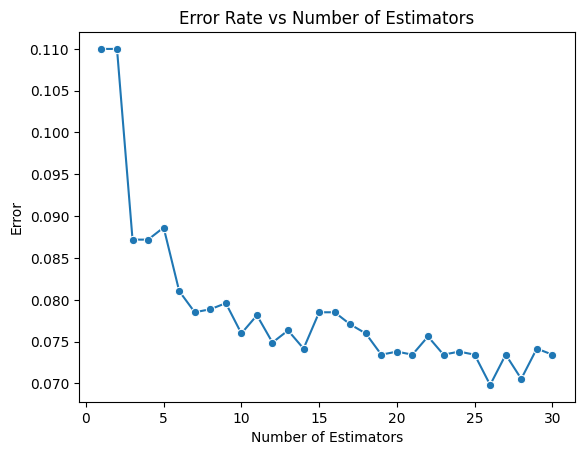

In [11]:
plt.title("Error Rate vs Number of Estimators")
sns.lineplot(x=range(1, len(X.columns) + 1), y=error_list, marker='o', palette = "husl")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.show()

Looking at the line plot, I decided to go with 20 estimators.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


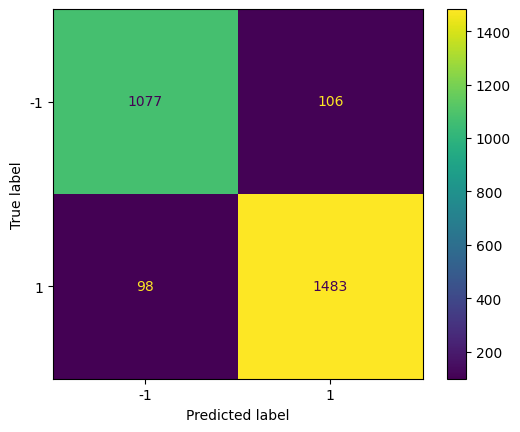

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91      1183
           1       0.93      0.94      0.94      1581

    accuracy                           0.93      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.93      0.93      0.93      2764



In [12]:
model = AdaBoostClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

The overall accuracy is good at 93% as well as over 90% for precision, recall and F1 scores. I was curious to see how it would perform with 30 estimators.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


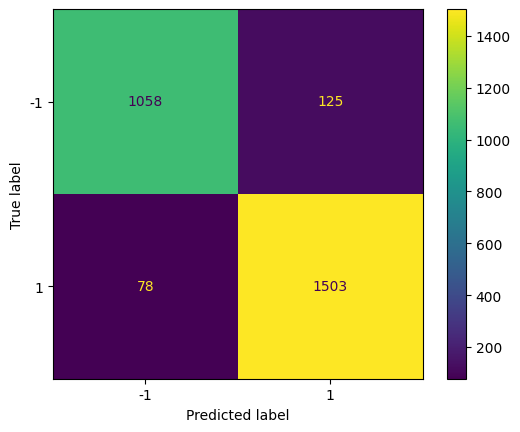

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1183
           1       0.92      0.95      0.94      1581

    accuracy                           0.93      2764
   macro avg       0.93      0.92      0.92      2764
weighted avg       0.93      0.93      0.93      2764



In [13]:
model = AdaBoostClassifier(n_estimators=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

With 30 estimators, it achieved more true positives correct but less true negatives. Overall still 93% accuracy. Next, I wanted to see how random forests would do with this data set.

In [14]:
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


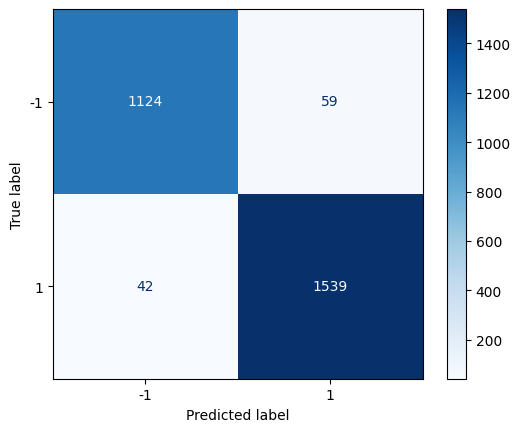

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96      1183
           1       0.96      0.97      0.97      1581

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.show()
print(classification_report(y_test, y_pred))

Random forests did better in every statistic. For this data set, random forest was better.